In [110]:
install.packages("FactoMineR")
library("FactoMineR")
install.packages("factoextra")
library("factoextra")
install.packages("viridis")
library("viridis")
install.packages("ggplot2")
library("ggplot2")
ionomics <- read.csv("PCA.csv",header = TRUE)
ionomics <- ionomics[,2:20]
ionomics <- ionomics[,-10] #Iron <- Essential, but noisey
ionomics <- ionomics[,-13] #Copper <- Essential, but noisey
ionomics <- ionomics[,-1] #Lithium
ionomics <- ionomics[,-4] #Aluminium
ionomics <- ionomics[,-10] #Nickel
ionomics <- ionomics[,-11] #Arsenic
ionomics <- ionomics[,-11] #Rubidium
ionomics <- ionomics[,-11] #Strontium
names(ionomics)

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'FactoMineR' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'factoextra' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'viridis' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'ggplot2' is in use and will not be installed"


[1] "ZB11"  "ZNa23" "ZMg26" "ZP31"  "ZS34"  "ZK39"  "ZCa44" "ZMn55" "ZCo59"
[10] "ZZn66" "ZMo98"

This loads the packages and the file needed, as well as removes ions that are non essential or noisey. This step is a useful one to simplify interpretation. These ions can be added back if we are interested in a different investigation. 

In [34]:
ionsPCA <- PCA(ionomics, scale.unit = TRUE, ncp = 3, graph = TRUE ) #Scale.unit False means covariance
ionsPCA
print("Summary Statistics")
ionsPCA$call
print("Means")
ionsPCA$call$centre
print("Standard Errors")
ionsPCA$call$ecart.type
print("Weights for individuals")
ionsPCA$call$row.w
print("Weights for dimensions")
ionsPCA$call$col.w

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 164 individuals, described by 11 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

[1] "Summary Statistics"


$row.w
  [1] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
  [7] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [13] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [19] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [25] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [31] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [37] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [43] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [49] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [55] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [61] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [67] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [73] 0.006097561 0.006097561 0.006097561 0.006097561 0.0

[1] "Means"


[1]  0.007686437 -0.069963528 -0.051068423  0.061984637  0.076055562
 [6]  0.067980400 -0.020904196 -0.011077582 -0.131093019  0.066962024
[11] -0.006134541

[1] "Standard Errors"


[1] 1.0141055 0.2485802 0.9054680 0.9882163 1.0063509 1.0124494 0.9530001
 [8] 1.0456005 0.8221076 1.0802202 0.9018080

[1] "Weights for individuals"


[1] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
  [7] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [13] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [19] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [25] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [31] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [37] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [43] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [49] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [55] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [61] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [67] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [73] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [79] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [85] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [91] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
 [97] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[103] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[109] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[115] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[121] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[127] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[133] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[139] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[145] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[151] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[157] 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561 0.006097561
[163] 0.006097561 0.006097561

[1] "Weights for dimensions"


[1] 1 1 1 1 1 1 1 1 1 1 1

In [50]:
eig.val <- get_eigenvalue(ionsPCA)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.9584318,26.894835,26.89483
Dim.2,2.2773973,20.703612,47.59845
Dim.3,1.5666858,14.242598,61.84105
Dim.4,1.0824784,9.840713,71.68176
Dim.5,0.8278779,7.526163,79.20792
Dim.6,0.7672660,6.975145,86.18307
Dim.7,0.5126530,4.660482,90.84355
Dim.8,0.3725584,3.386895,94.23044
Dim.9,0.2960969,2.691790,96.92223
Dim.10,0.2236708,2.033370,98.95560


This shows the different dimensions, or eigenvalues associated with this PCA. The values are ranked from largest to smallest, as a larger value indicates more % variance explained. This also shows us the % variance explained by each dimension (multiply the eigenvalue by 10), as well as the cumulative % variance explained. With only 2 dimensions, we can explain 49% of the variance of 20 dimensions. 

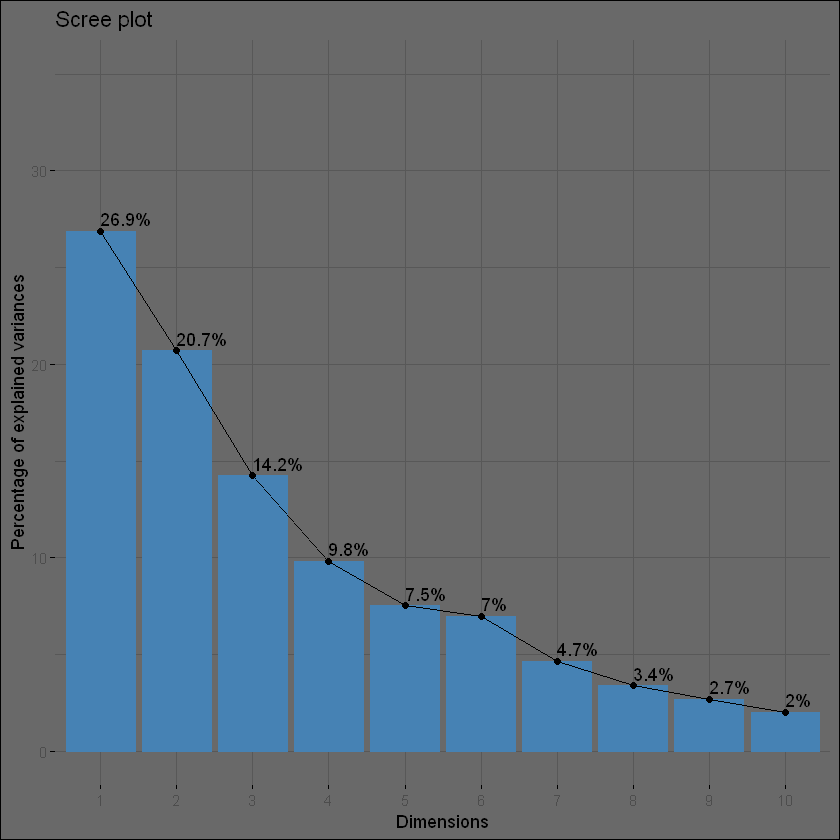

In [101]:
fviz_eig(ionsPCA, addlabels = TRUE, ylim = c(0, 35))+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),
      panel.grid = element_line(color = '#585858'),
      plot.background = element_rect(fill = "#696969") )

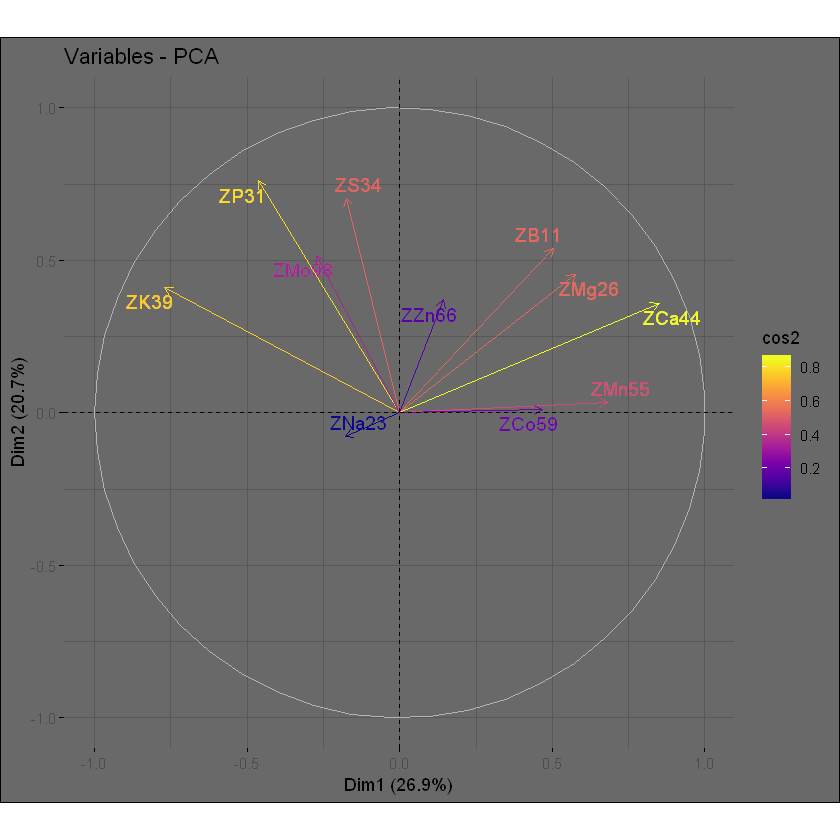

In [100]:
fviz_pca_var(ionsPCA, col.var = "cos2", gradient.cols = plasma(256), repel = TRUE)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),
      panel.grid = element_line(color = '#585858'),
      plot.background = element_rect(fill = "#696969") )

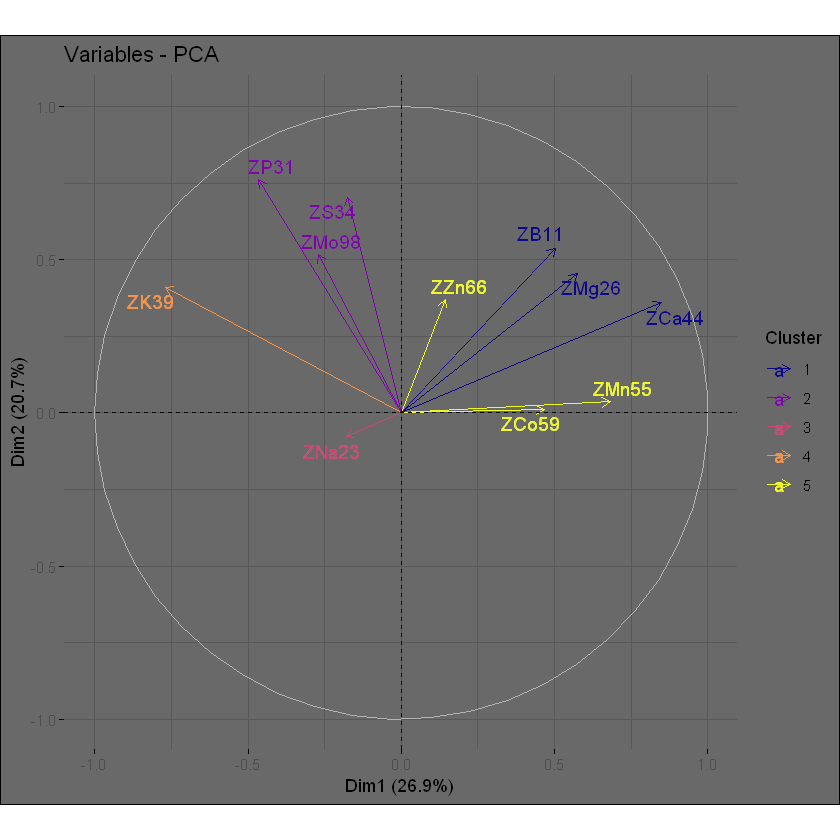

ERROR: Error in as.ggdend(clusDendro): could not find function "as.ggdend"


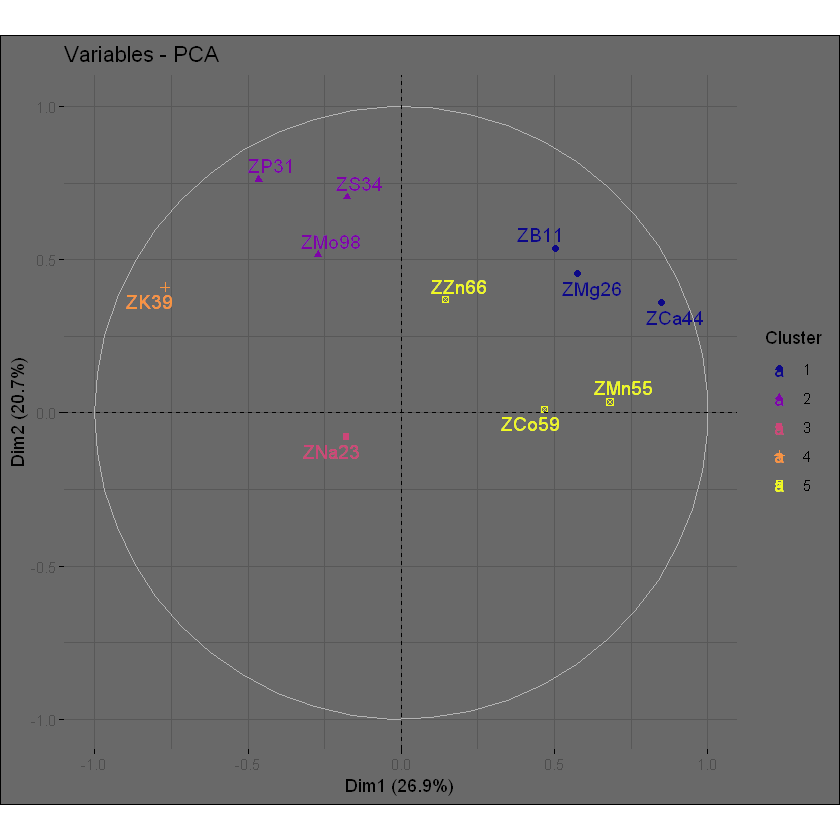

In [109]:
set.seed(123)
ions.km <- kmeans(ionsPCA$var$coord, centers = 5, nstart = 25)
grp <- as.factor(ions.km$cluster)
hc <- hclust(dist(ionsPCA$var$coor))
hcd <- as.dendrogram(hc)
fviz_pca_var(ionsPCA, col.var = grp, 
             palette = plasma(5),
             legend.title = "Cluster",
            repel = TRUE)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),
      panel.grid = element_line(color = '#585858'),
      plot.background = element_rect(fill = "#696969") )

fviz_pca_var(ionsPCA, col.var = grp, 
             palette = plasma(5),
             legend.title = "Cluster",
            repel = TRUE,
            geom = c("point","text"))+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),
      panel.grid = element_line(color = '#585858'),
      plot.background = element_rect(fill = "#696969") )

labelColors = viridis(5)
clusMember = cutree(hc, 5)

colLab <- function(n) {
    if (is.leaf(n)) {
        a <- attributes(n)
        labCol <- labelColors[clusMember[which(names(clusMember) == a$label)]]
        attr(n, "nodePar") <- c(a$nodePar, lab.col = labCol)
    }
    n
}
clusDendro = dendrapply(hcd, colLab)
clusDendro <- as.ggdend(clusDendro)
ggplot(clusDendro)

* Positively correlated variables are grouped together
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

From this we can see that As, Mn, Ni, Fe, Li, Al, and Co are positively associated (Group 1), and all reasonably well represented. Furthermore, Cu and P (Group 2) are associated and negatively associated with Group 1, while Zn and Mg (Group 3) are associated but are not opposed to any other group. Group 3 also has a lower representation, and lastly S and Mo are associated (Group 4). These groupings should be investigated with QTL analysis. 

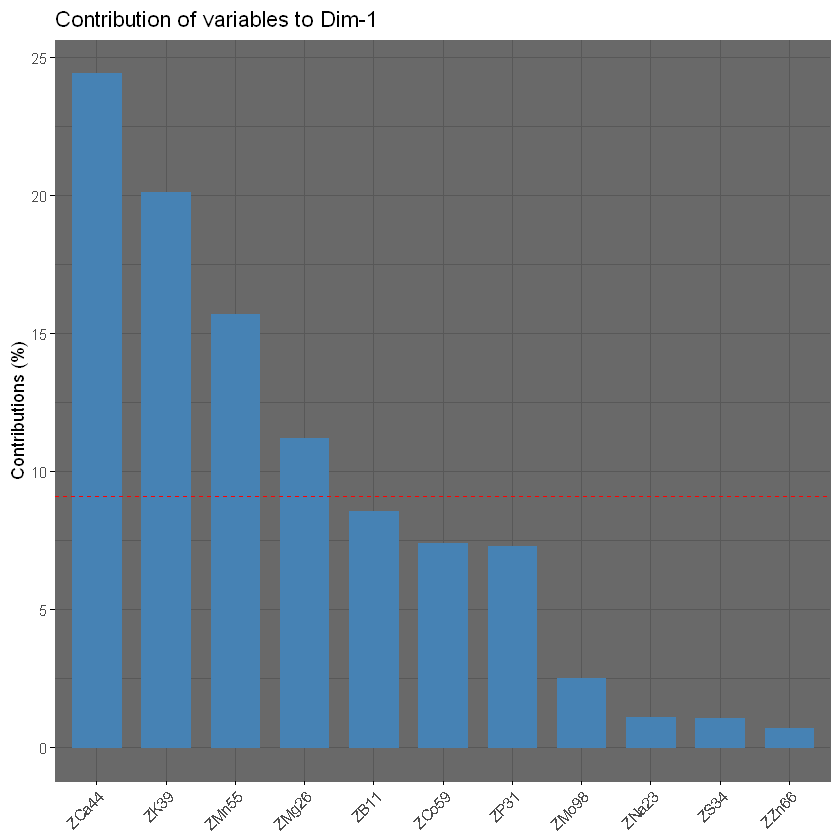

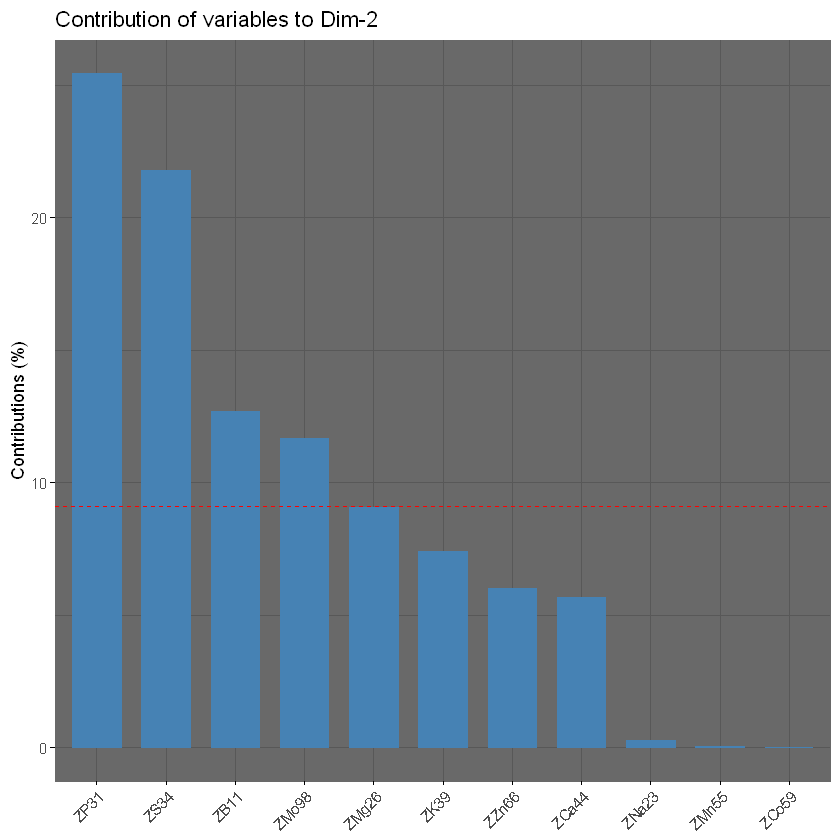

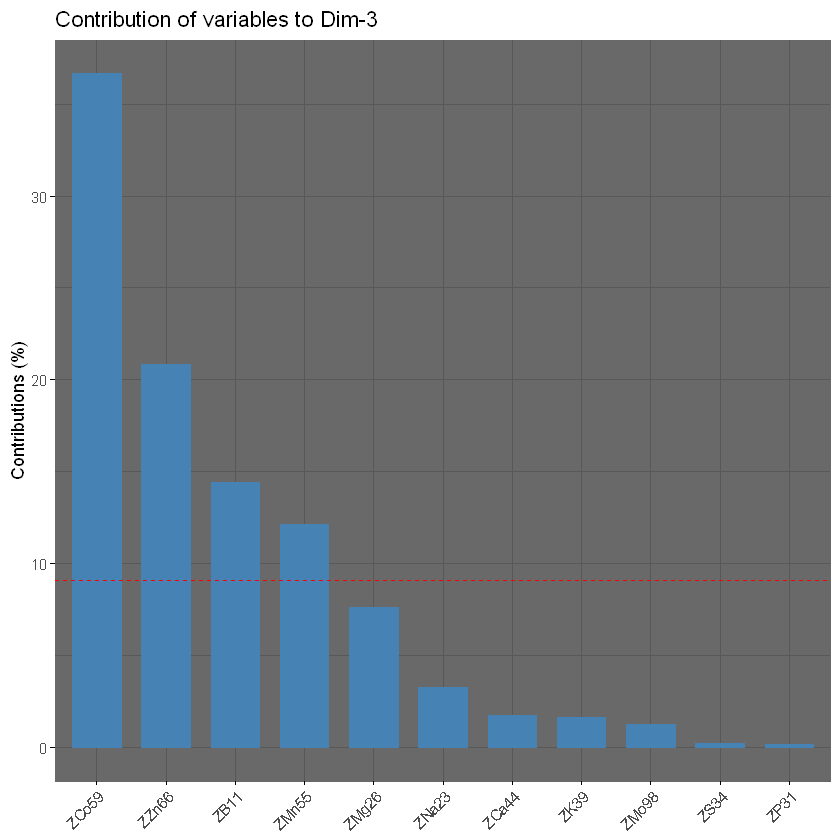

In [94]:
fviz_contrib(ionsPCA, choice = "var", axes = 1)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )
fviz_contrib(ionsPCA, choice = "var", axes = 2)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )
fviz_contrib(ionsPCA, choice = "var", axes = 3)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )
#fviz_contrib(ionsPCA, choice = "var", axes = 1:2)

In [95]:
res.desc <- dimdesc(ionsPCA, axes = c(1,2,3), proba = 0.05)
res.desc$Dim.1
res.desc$Dim.2
res.desc$Dim.3
#Sr occurs in both, dues to the orthogonal nature of the Dims.
#Combined may not be as informative as indep. axes

$quanti
      correlation      p.value
ZCa44   0.8496119 7.146590e-47
ZMn55   0.6814723 9.904876e-24
ZMg26   0.5760254 7.047521e-16
ZB11    0.5030471 6.663755e-12
ZCo59   0.4681714 2.591546e-10
ZS34   -0.1759990 2.417899e-02
ZNa23  -0.1792334 2.165421e-02
ZMo98  -0.2717213 4.322467e-04
ZP31   -0.4646133 3.680555e-10
ZK39   -0.7710170 1.437999e-33

attr(,"class")
[1] "condes" "list " 

$quanti
      correlation      p.value
ZP31    0.7609102 3.029933e-32
ZS34    0.7040861 7.268473e-26
ZB11    0.5378840 1.109647e-13
ZMo98   0.5152909 1.665587e-12
ZMg26   0.4540438 1.019314e-09
ZK39    0.4102393 4.883171e-08
ZZn66   0.3699742 1.083226e-06
ZCa44   0.3592008 2.318895e-06

attr(,"class")
[1] "condes" "list " 

$quanti
      correlation      p.value
ZCo59   0.7576366 7.873999e-32
ZZn66   0.5711366 1.398396e-15
ZMn55   0.4363159 5.214791e-09
ZK39    0.1591061 4.185607e-02
ZCa44  -0.1659798 3.366377e-02
ZNa23  -0.2272106 3.435434e-03
ZMg26  -0.3455465 5.851351e-06
ZB11   -0.4757206 1.214652e-10

attr(,"class")
[1] "condes" "list " 

Correlations are correlated with the loadings, or eigenvectors

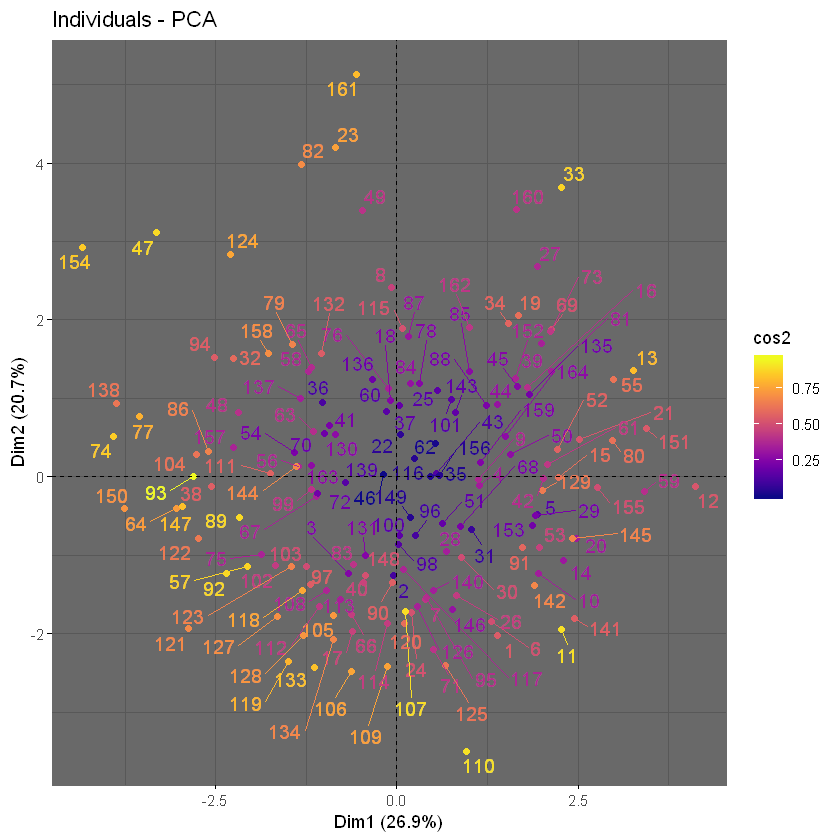

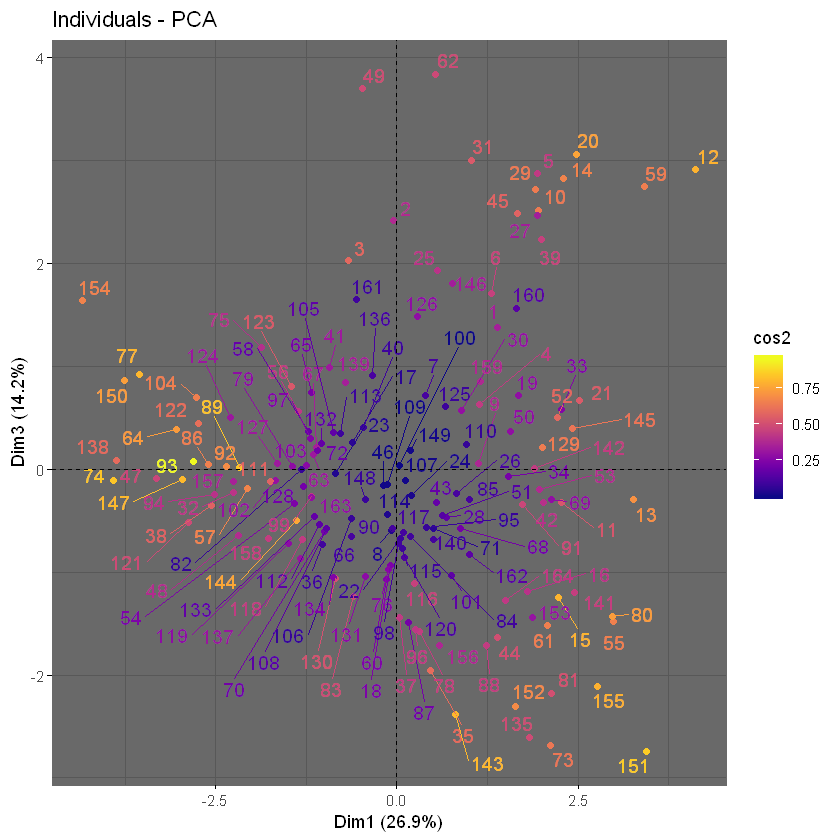

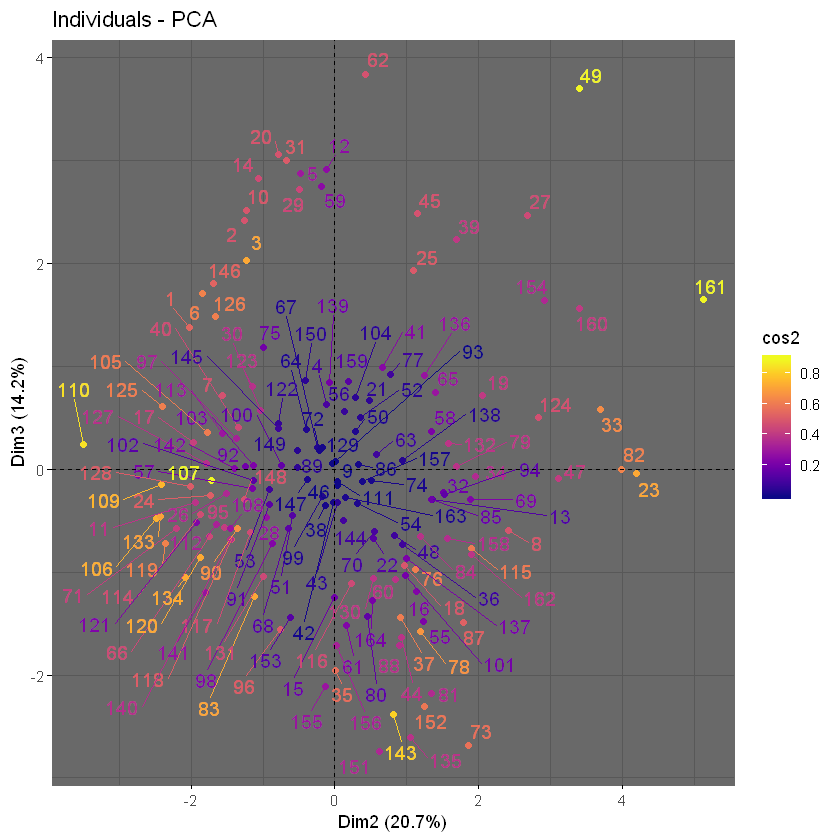

In [113]:
fviz_pca_ind(ionsPCA,
             col.ind = "cos2",
             gradient.cols = plasma(256),
             axes = c(1,2),
             repel = TRUE)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )
fviz_pca_ind(ionsPCA,
             col.ind = "cos2",
             gradient.cols = plasma(256),
             axes = c(1,3),
             repel = TRUE)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )
fviz_pca_ind(ionsPCA,
             col.ind = "cos2",
             gradient.cols = plasma(256),
             axes = c(2,3),
             repel = TRUE)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )

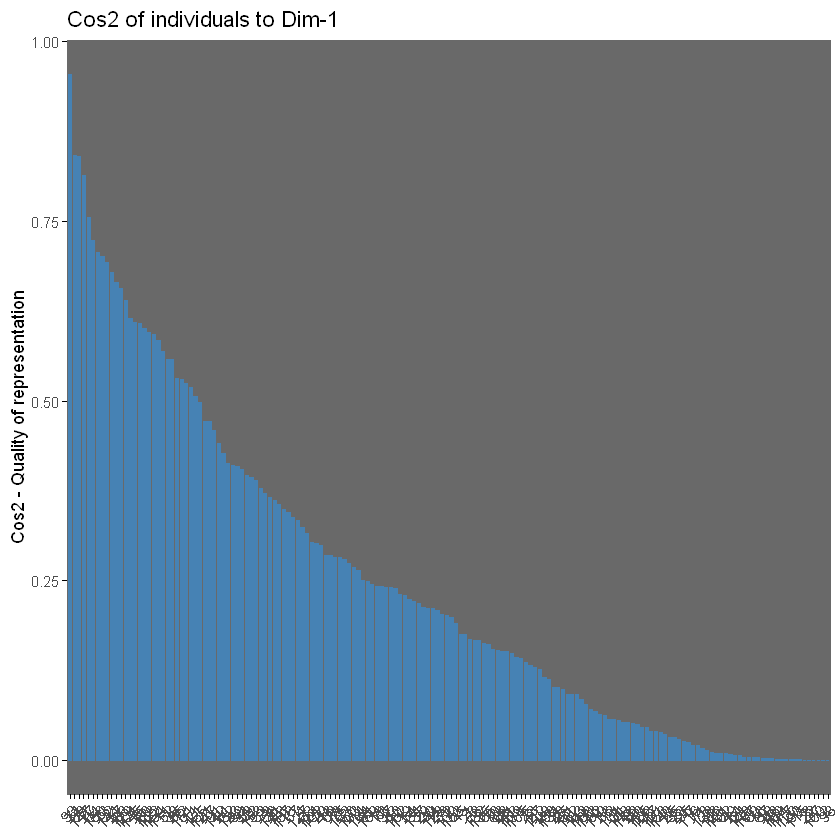

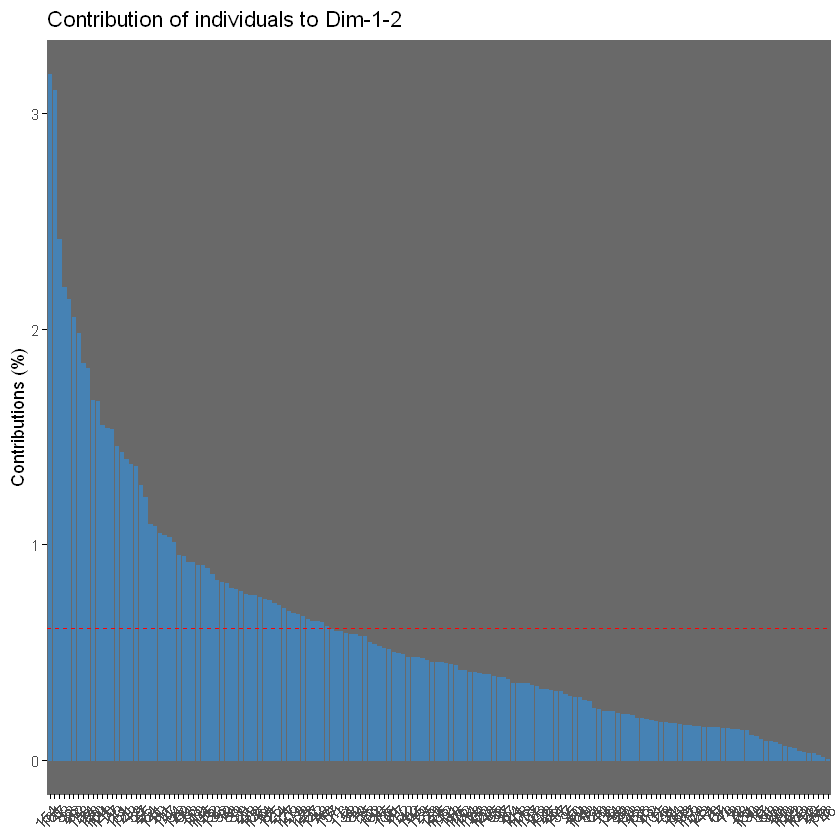

In [98]:
fviz_cos2(ionsPCA, choice = "ind")+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#696969') )
fviz_contrib(ionsPCA, choice = "ind", axes = 1:2)+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#696969') )

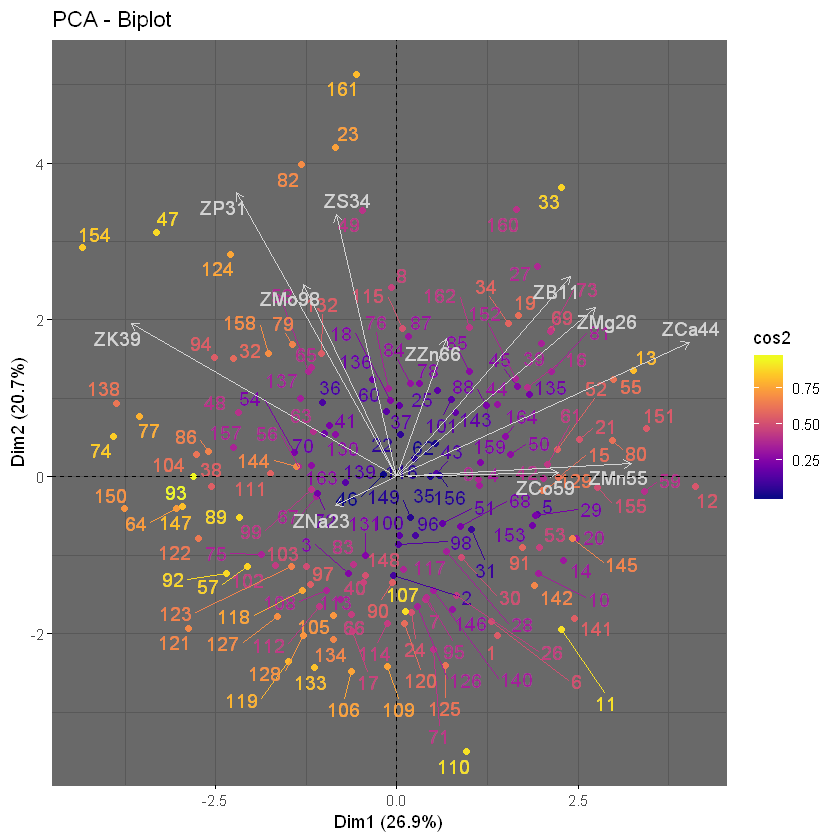

In [114]:
fviz_pca_biplot(ionsPCA,repel = "True",
                col.ind = "cos2",
                gradient.cols = plasma(256),
                col.var = "light grey"
               )+ 
theme(panel.background = element_rect(fill = '#696969', colour = '#696969'),panel.grid = element_line(color = '#585858') )

In [65]:
cor(ionomics)

,ZB11,ZNa23,ZMg26,ZP31,ZS34,ZK39,ZCa44,ZMn55,ZCo59,ZZn66,ZMo98
ZB11,1.000000000,-0.081382967,0.55879916,0.13843807,0.20940160,-0.20889729,0.63741571,0.11773065,-0.08613444,0.064670194,0.007281405
ZNa23,-0.081382967,1.000000000,0.05297335,0.03007726,-0.09674623,0.04558016,-0.13598306,-0.19941974,-0.11175473,-0.008557291,0.012925795
ZMg26,0.558799164,0.052973347,1.00000000,0.08549347,0.10830919,-0.21980101,0.62943748,0.18390038,0.11726318,0.088559861,-0.066306706
ZP31,0.138438074,0.030077262,0.08549347,1.00000000,0.47676100,0.66066036,-0.12886004,-0.24615760,-0.13584814,0.219631904,0.445391274
ZS34,0.209401600,-0.096746229,0.10830919,0.47676100,1.00000000,0.41966554,0.07428199,0.05097488,-0.05467181,0.091943344,0.258383781
ZK39,-0.208897287,0.045580162,-0.21980101,0.66066036,0.41966554,1.00000000,-0.57179923,-0.36955779,-0.19399524,0.072546791,0.262453977
ZCa44,0.637415710,-0.135983057,0.62943748,-0.12886004,0.07428199,-0.57179923,1.00000000,0.51801827,0.21504998,0.167167259,0.033856448
ZMn55,0.117730652,-0.199419736,0.18390038,-0.24615760,0.05097488,-0.36955779,0.51801827,1.00000000,0.56928967,0.098967999,-0.082615405
ZCo59,-0.086134437,-0.111754726,0.11726318,-0.13584814,-0.05467181,-0.19399524,0.21504998,0.56928967,1.00000000,0.423182279,-0.068140175
ZZn66,0.064670194,-0.008557291,0.08855986,0.21963190,0.09194334,0.07254679,0.16716726,0.09896800,0.42318228,1.000000000,0.130836280
